In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [2]:
true_w = 1
true_b = 2

N = 100

np.random.seed(42)
X = np.random.rand(N, 1)
epsillon = 0.1 * np.random.randn(N, 1)
Y = true_w * X + true_b + epsillon

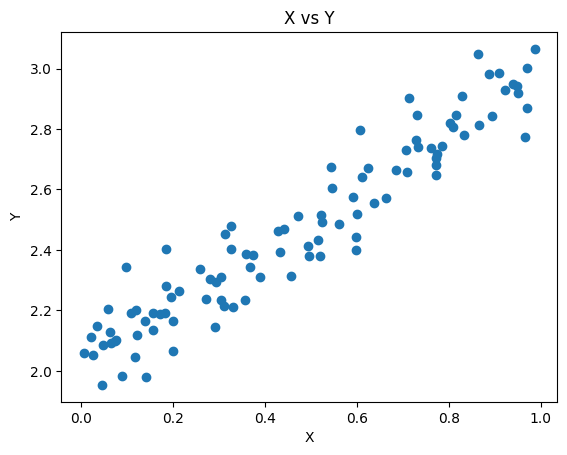

In [3]:
plt.scatter(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs Y")
plt.show()

In [4]:
idx = np.arange(N)
np.random.shuffle(idx)
train_idx = idx[: int(N * 0.8)]
val_idx = idx[int(N * 0.8): ]

x_train, y_train = X[train_idx], Y[train_idx]
x_val, y_val = X[val_idx], Y[val_idx]

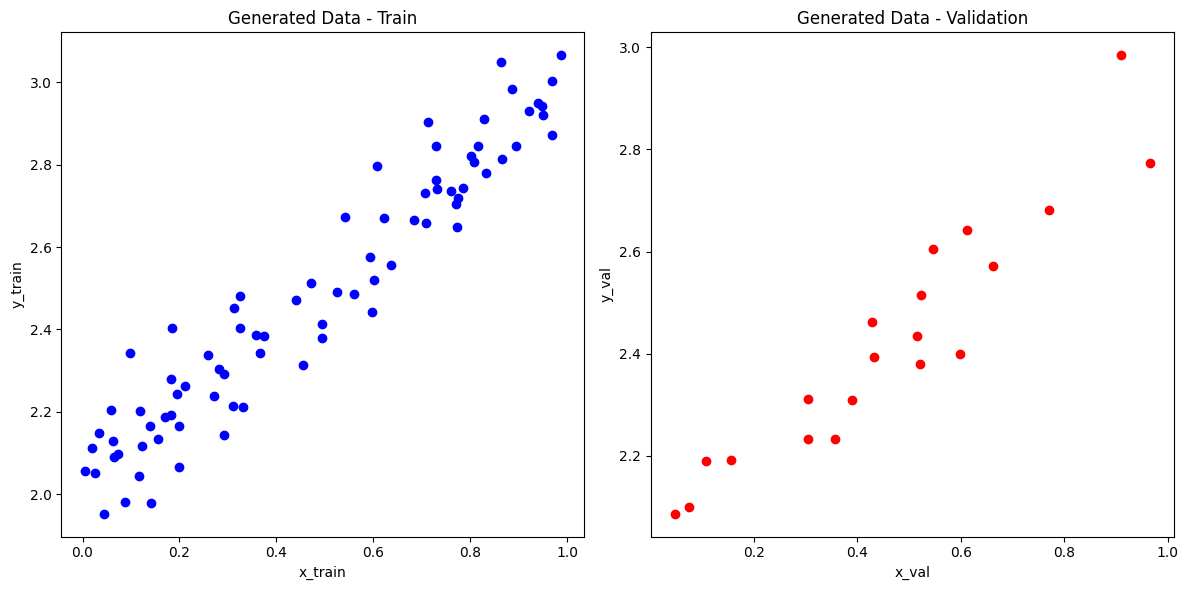

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes = axes.flatten()
axes[0].scatter(x_train, y_train, color='blue')
axes[0].set_xlabel("x_train")
axes[0].set_ylabel("y_train")
axes[0].set_title("Generated Data - Train")

axes[1].scatter(x_val, y_val, color='red')
axes[1].set_xlabel("x_val")
axes[1].set_ylabel("y_val")
axes[1].set_title("Generated Data - Validation")

plt.tight_layout()
plt.show()

In [6]:
x_train.shape

(80, 1)

In [7]:
# Stochastic Gradient Descent
ITERATIONS = 1000
lr = 0.1
TOLERANCE = 1e-5
np.random.seed(42)
w, b = np.random.rand(1), np.random.rand(1)

prev_loss = float('-inf')

for i in range(ITERATIONS):
    idx = np.random.randint(x_train.shape[0])
    x = x_train[idx]
    y = y_train[idx]
    y_pred = w * x + b

    error = y_pred - y
    loss = 0.5 * (error ** 2)

    if abs(loss - prev_loss) <= TOLERANCE:
        print(f"Early stopping at iteration: {i}. w: {w} b: {b}, loss: {loss}")
        break

    if i % 100 == 0:
        print(f"Iteration: {i}, w: {w} b: {b}, loss: {loss}")

    w = w - lr * (error * x)
    b = b - lr * error
    prev_loss = loss


Iteration: 0, w: [0.37454012] b: [0.95071431], loss: [0.90415419]
Early stopping at iteration: 86. w: [0.97457195] b: [2.0056913], loss: [0.00146242]


In [8]:
print(f"w and b using SGD: ({w}, {b})")
linr = LinearRegression()
linr.fit(x_train, y_train)
print(f"w and b using sklearn's LinearRegression: ({linr.coef_[0]}, {linr.intercept_})")

w and b using SGD: ([0.97457195], [2.0056913])
w and b using sklearn's LinearRegression: ([0.96896447], [2.02354075])


In [9]:
arr = torch.tensor((2, 1), dtype=torch.float)
arr.shape, arr.size()

(torch.Size([2]), torch.Size([2]))

In [10]:
torch.rand(4, 1)

tensor([[0.6915],
        [0.0820],
        [0.1119],
        [0.6469]])

In [11]:
torch.randint(0, 20, size=(4,))

tensor([ 1,  0, 14,  1])

In [12]:
torch.randn(4, 1)

tensor([[ 2.5641],
        [ 0.2926],
        [ 0.7494],
        [-0.2428]])

In [13]:
torch.ones(4, 1)

tensor([[1.],
        [1.],
        [1.],
        [1.]])

In [14]:
torch.zeros(4, 1)

tensor([[0.],
        [0.],
        [0.],
        [0.]])

In [15]:
arr2 = torch.ones(4, 1)
arr2.size()

torch.Size([4, 1])

In [16]:
arr2_copy = arr2.clone()
arr2_copy

tensor([[1.],
        [1.],
        [1.],
        [1.]])

In [17]:
arr2_reshaped = arr2.view(2, 2)
arr2_reshaped

tensor([[1., 1.],
        [1., 1.]])

In [18]:
x = torch.tensor(np.arange(4))
y = 2 * x

x, y

(tensor([0, 1, 2, 3]), tensor([0, 2, 4, 6]))

In [19]:
x = torch.tensor(np.arange(4), dtype=torch.float32, requires_grad=True)
y = 2 * x

x, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 2., 4., 6.], grad_fn=<MulBackward0>))

In [20]:
z = y.sum()
z.backward()
x.grad

tensor([2., 2., 2., 2.])

In [21]:
z

tensor(12., grad_fn=<SumBackward0>)

### view vs copy
A view is a new tensor that shares the same memory address as the original tensor so changing one affects the other

A copy is a whole new tensor with it's one memory address. Changing one does not affect the other

In [ ]:
x = torch.tensor(np.arange(1, 4))
y = x[1: ]  # this is a view

print(f"Original x and y: {x}, {y}")

y[0] = 100  # changing y
print(f"x and y after update: {x}, {y}")

Original x and y: tensor([1, 2, 3]), tensor([2, 3])
x and y after update: tensor([  1, 100,   3]), tensor([100,   3])


In [29]:
x = torch.tensor(np.arange(1, 4))
y = x[1:].clone() # this is a copy

print(f"Original x and y: {x}, {y}")

y[0] = 100  # changing y
print(f"x and y after update: {x}, {y}")

Original x and y: tensor([1, 2, 3]), tensor([2, 3])
x and y after update: tensor([1, 2, 3]), tensor([100,   3])


In [33]:
x = torch.tensor(np.arange(1, 4))
print(f"x before detach(): {x}")
z = x.detach()   # .detach() creates a view
z[0] = 20
print(f"x and z after detach(): {x}, {z}")

x before detach(): tensor([1, 2, 3])
x and z after detach(): tensor([20,  2,  3]), tensor([20,  2,  3])


### Converting NumPy arrays to Tensors 

Both as_tensor() and from_numpy() return a view of the original NumPy array, so modifying one affects the other.

We can also directly call `torch.tensor(arr_np)` which creates a copy of the data

In [37]:
x_train[0], type(x_train), x_train.dtype

(array([0.77127035]), numpy.ndarray, dtype('float64'))

In [38]:
x_train_tensor = torch.as_tensor(x_train)
x_train_tensor.dtype

torch.float64

In [44]:
arr = np.arange(1, 4)
arr_tensor = torch.as_tensor(arr)

arr[0] = 100
arr_tensor[-1] = 100

arr, arr_tensor

(array([100,   2, 100]), tensor([100,   2, 100]))

In [45]:
arr = np.arange(1, 4)
arr_tensor = torch.tensor(arr)

arr[0] = 100
arr_tensor[-1] = 100

arr, arr_tensor

(array([100,   2,   3]), tensor([  1,   2, 100]))

### Transforming Tensors to NumPy arrays

In [42]:
arr_np = arr_tensor.numpy()
arr_np

array([100,   2, 100])

In [43]:
torch.tensor(arr)

tensor([100,   2, 100])